In [1]:
import pybel
import logging
import os
import networkx as nx
import nx2d3
import logging
from operator import itemgetter
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

%matplotlib inline

In [2]:
logging.basicConfig(level=logging.INFO)
logging.getLogger("requests").setLevel(logging.WARNING)

In [3]:
time.asctime()

'Sat Oct  8 20:30:37 2016'

In [4]:
#eng = sqla.create_engine('sqlite://mydb.db')
#Mapper(eng).get_namespace_dict()
#Mapper(en).get_namespace_mapping()
#g = pybel.from_bel('~/Desktop/AD.bel', namespace_database=eng)
g = pybel.from_path('~/Desktop/AD.bel')

INFO:pybel.parser.utils:File length: 26340 lines
ERROR:pybel.graph:Failed: 4)  Using Drugs as Molecular Probes: Enabling a “Chemical Biology" Approach in Molecular Systems Biology of the Brain Mohammad Asif Emran Khan Emon, Alpha Tom Kodamullil1, Erfan Yonesi, Reagon Karki, Shahid Mohammad, Martin Hofmann-Apitius 5) Comorbidity analysis between Alzheimer’s disease and Type 2 Diabetes Mellitus based on disease network models and the role T2DM drug: metformin in AD Reagon Karki, Alpha Tom Kodamullil, Mufassra Naz, Martin Hofmann-Apitius SET DOCUMENT Authors = "Alpha Tom Kodamullil, Reagon Karki, Mohammad Asif Emon, Mengjun Wu, Mufassra Naz, Daniel Domingo-Fernandez"
INFO:pybel.graph:Finished parsing document section in 0.17 seconds
ERROR:pybel.graph:General failure: DEFINE NAMESPACE LMSD AS URL "https://dl.dropboxusercontent.com/u/43656618/LMSD.belns"
ERROR:pybel.graph:General failure: DEFINE NAMESPACE BRCO AS URL "http://belief.scai.fraunhofer.de/openbel/repository/namespaces/BRCO.belns

In [5]:
time.asctime()

'Sat Oct  8 20:34:06 2016'

In [10]:
next(iter(g.edges_iter()))

<generator object MultiDiGraph.edges_iter at 0x11d150e08>

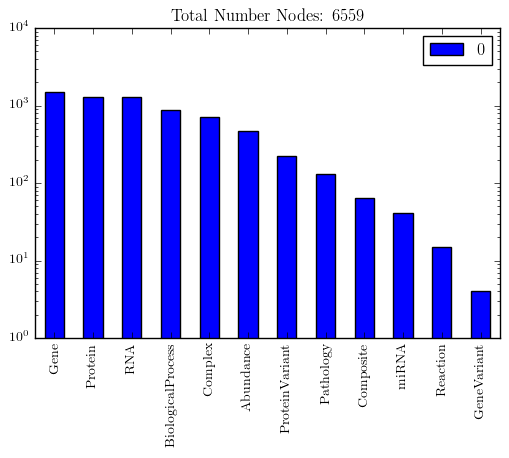

In [6]:
c = Counter(map(itemgetter(0), filter(lambda x:x,g)))
df = pd.DataFrame.from_dict(c, orient='index')
df.sort_values(0, ascending=False).plot(kind='bar', logy=True)
plt.title('Total Number Nodes: {}'.format(g.number_of_nodes()))
plt.show()

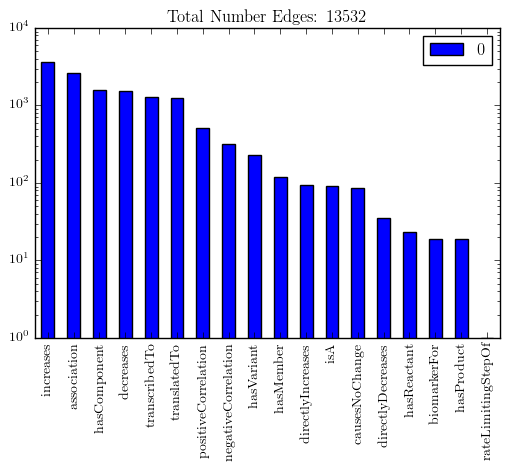

In [7]:
ec = Counter(data['relation'] for u, v, data in g.edges(data=True) if 'relation' in data)
df_ec = pd.DataFrame.from_dict(ec, orient='index')
df_ec.sort_values(0, ascending=False).plot(kind='bar', logy=True)
plt.title('Total Number Edges: {}'.format(g.number_of_edges()))
plt.show()

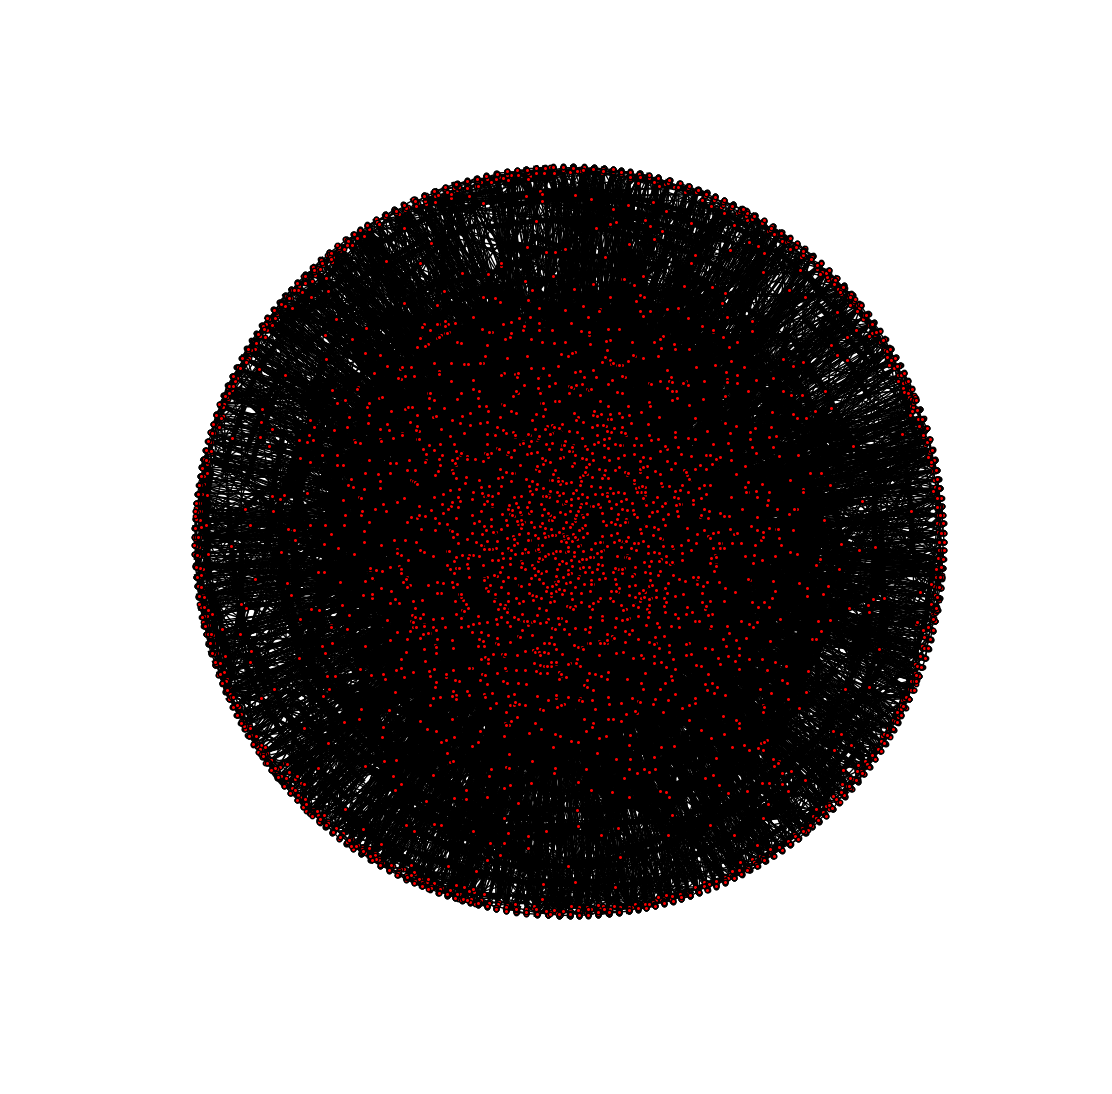

In [8]:
plt.figure(figsize=(10.5, 10.5))
nx.draw(g, node_size=10)